# NB to analyze the pitch derived from the IMU data

In [1]:
from functions.pitch_analysis import *
from zurich_move_data_extraction import extract_sensors_data_from_axivity_file
from functions.VQFpitch import IMUPitchCalculator

### iPhone

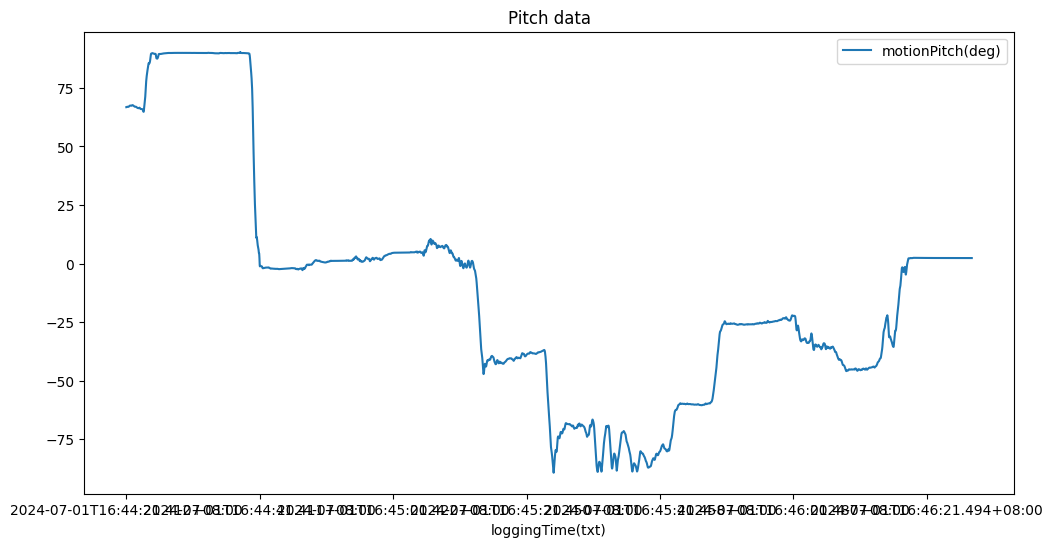

In [2]:
iphone_pitch = read_pitch_from_csv('../data/pitch_analysis/2024-07-01_16_44_21_my_iOS_device 2024-07-01 08_51_15.csv')
plot_pitch_data(iphone_pitch)

In [3]:
sensor_features = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']
LW_data = extract_sensors_data_from_axivity_file('../data/pitch_analysis/6023695_0000000999.resampled.csv', sensor_features)
RW_data = extract_sensors_data_from_axivity_file('../data/pitch_analysis/6022607_0000000999.resampled.csv', sensor_features)
acc_LW = LW_data[['acc_x', 'acc_y', 'acc_z']]
acc_RW = RW_data[['acc_x', 'acc_y', 'acc_z']]
gyro_LW = LW_data[['gyro_x', 'gyro_y', 'gyro_z']]
gyro_RW = RW_data[['gyro_x', 'gyro_y', 'gyro_z']]
sampling_freq = 50 # Hz

### VQF Pitch calculation

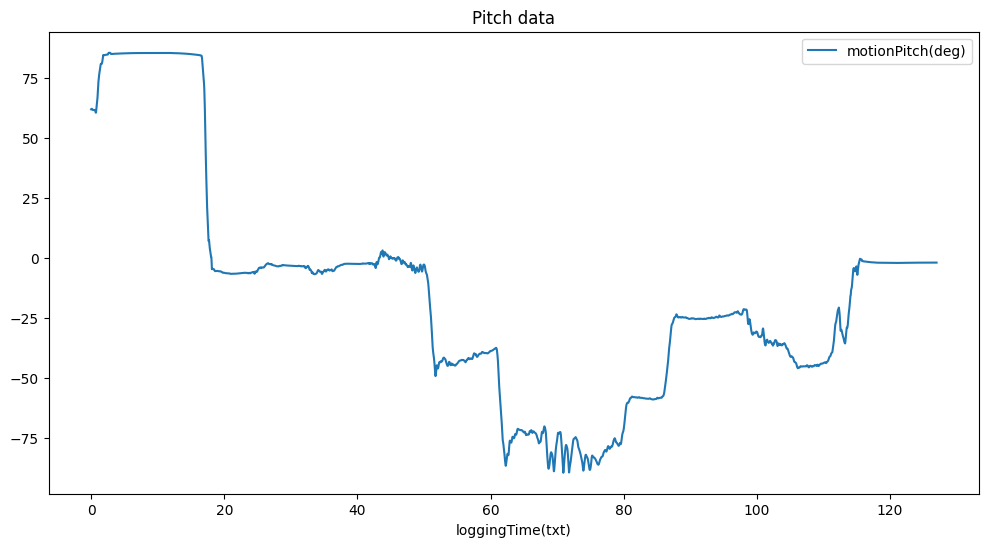

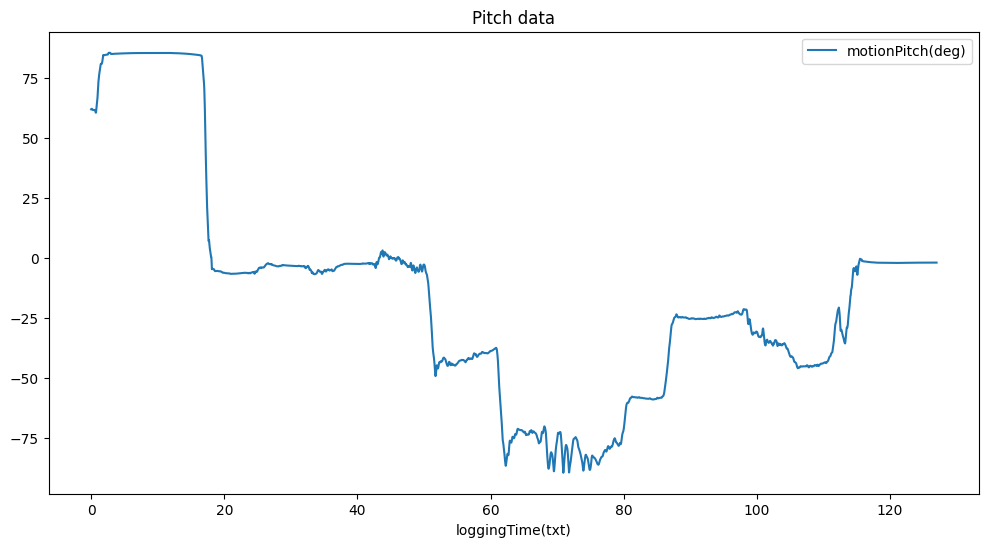

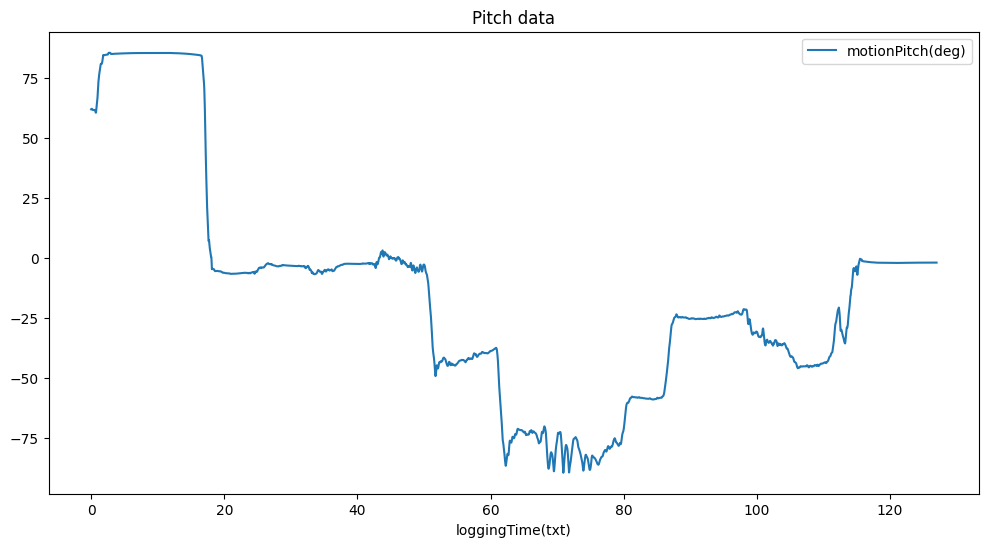

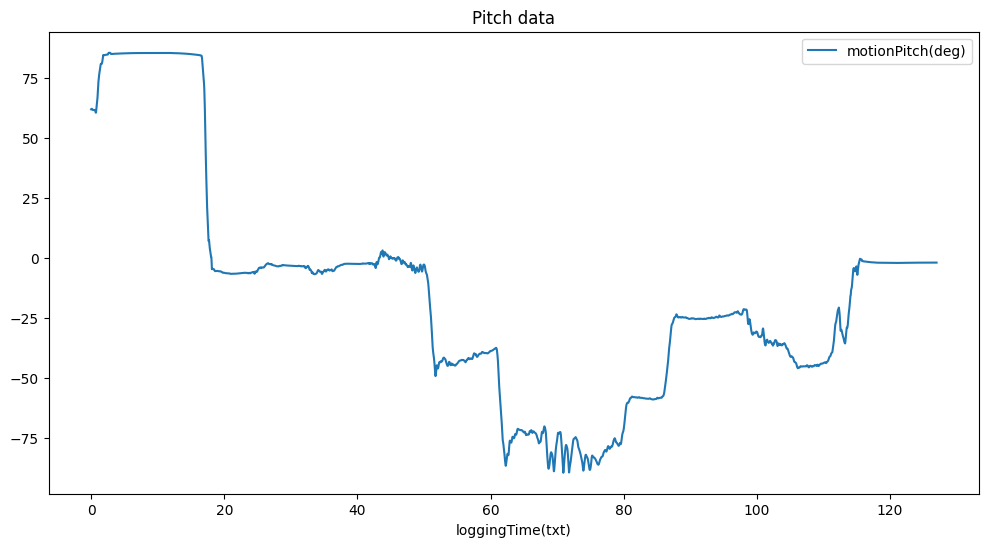

In [4]:
calculator_LW = IMUPitchCalculator(acc_LW.to_numpy().copy(), gyro_LW.to_numpy().copy(), sampling_freq)
pitch_VQF_LW = calculator_LW.calculate_pitch()
elevation_VQF_LW = calculator_LW.calculate_elevation()
calculator_LW.cut_recording(27*50, 154*50)
calculator_LW.plot_pitch(calculator_LW.pitch)
calculator_LW.plot_pitch(calculator_LW.elevation)
calculator_RW = IMUPitchCalculator(acc_RW.to_numpy().copy(), gyro_RW.to_numpy().copy(), sampling_freq)
pitch_VQF_RW = calculator_RW.calculate_pitch()
elevation_VQF_RW = calculator_RW.calculate_elevation()
calculator_RW.cut_recording(47*50, 174*50)
calculator_RW.plot_pitch(calculator_LW.pitch)
calculator_RW.plot_pitch(calculator_LW.elevation)

## Pitch per Primitive

In [5]:
from functions.pitch_analysis import *

In [6]:
label_to_int = {'functional_movement': 1, 'non_functional_movement': 0, 'reach': 2, 'reposition': 3, 'transport': 4, 'gesture': 5, 'idle': 6, 'stabilization': 7, 'arm_not_visible': 999}
int_to_label = {value: key for key, value in label_to_int.items()}
all_stroke_data = PitchPerPrimitive(label_to_int)

/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


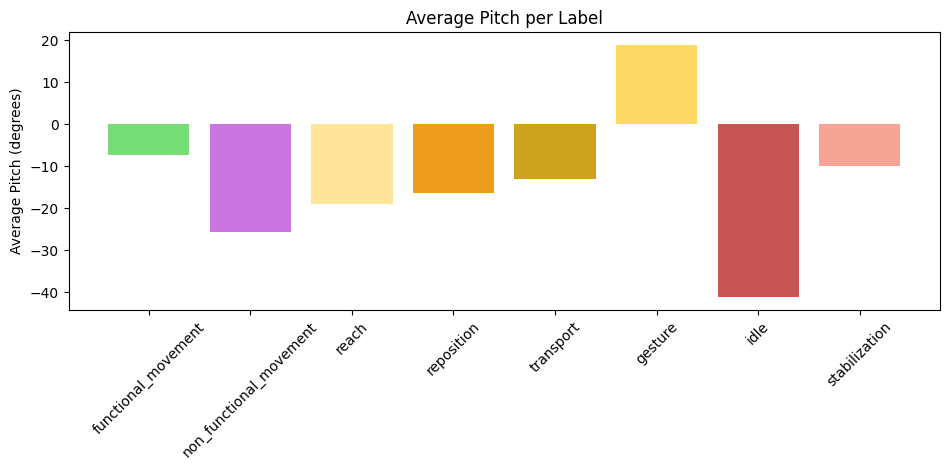

In [7]:
all_stroke_data.plot_pitch_per_label()

Not plotting arm_not_visible as it is not a primitive


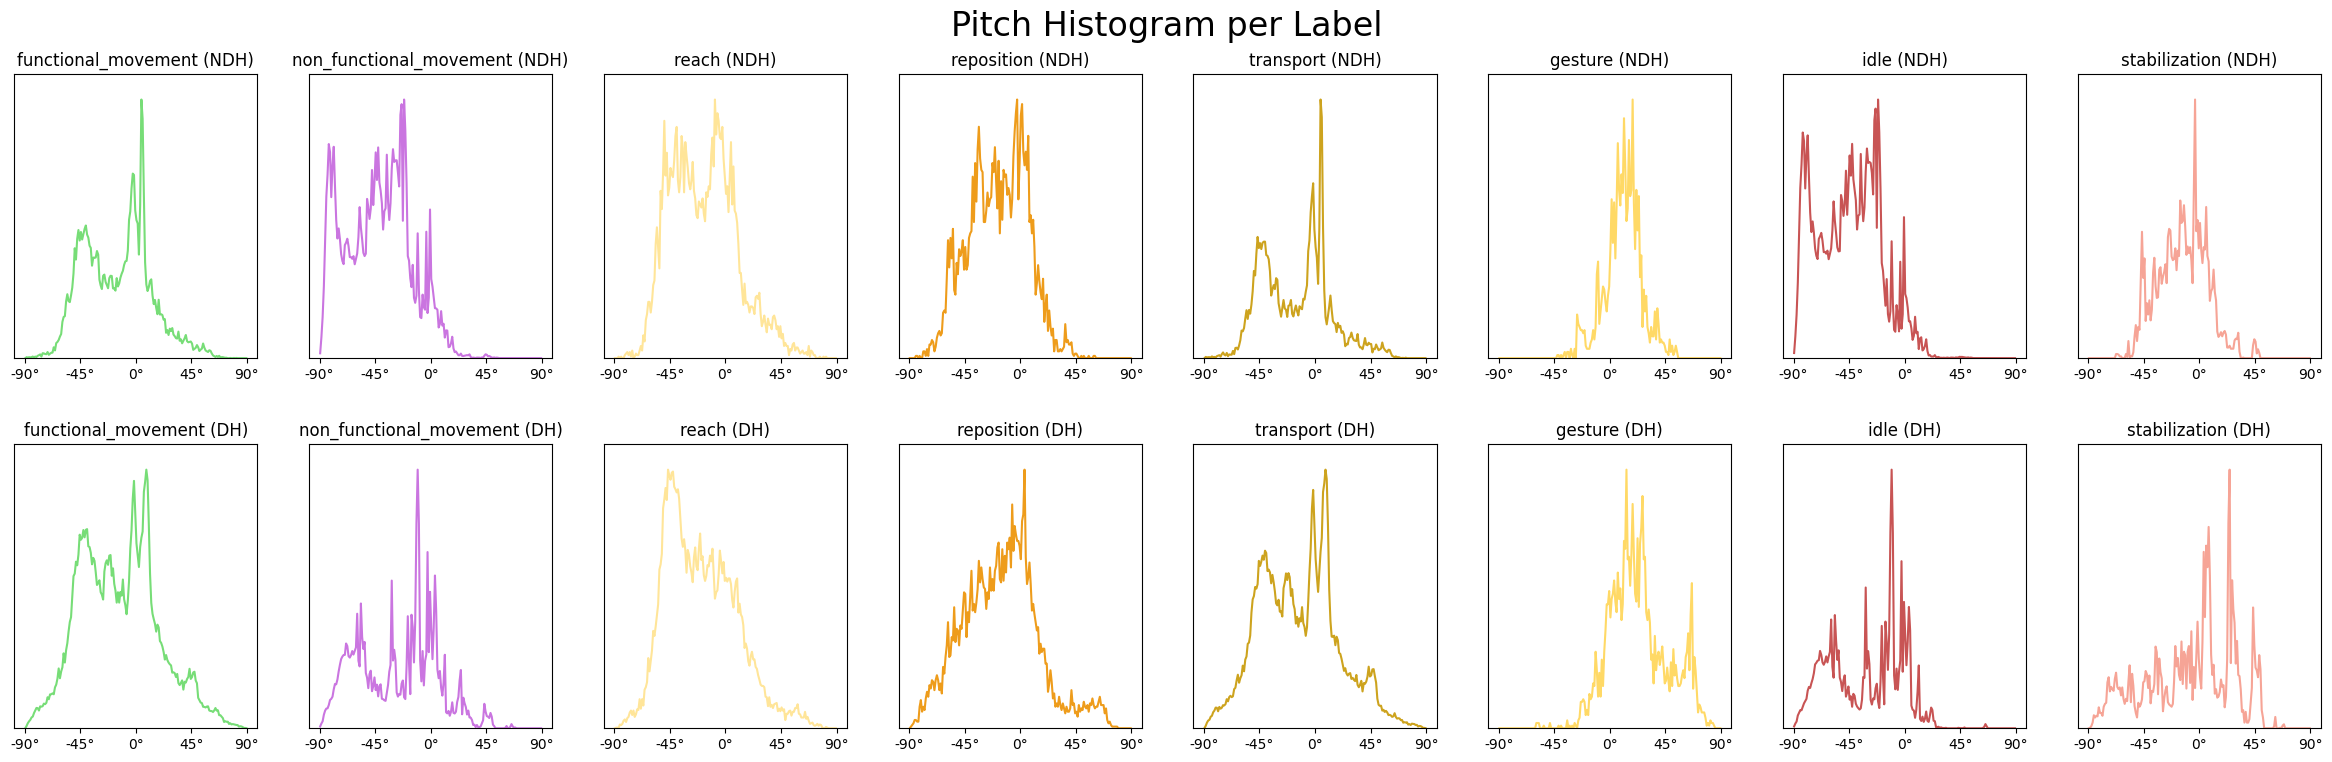

In [8]:
all_stroke_data.get_pitch_per_primitive_over_all_participants()
all_stroke_data.plot_polar_histogram()